<a href="https://colab.research.google.com/github/Giathi-Daniel/Data-Science/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load and Inspect the data set (Look for missing values, data types etc)
mydata = pd.read_csv('/content/xAPI-Edu-Data.csv')

print(mydata.head())
print(mydata.info())
print(mydata.describe)

  gender NationalITy PlaceofBirth  ... ParentschoolSatisfaction StudentAbsenceDays Class
0      M          KW       KuwaIT  ...                     Good            Under-7     M
1      M          KW       KuwaIT  ...                     Good            Under-7     M
2      M          KW       KuwaIT  ...                      Bad            Above-7     L
3      M          KW       KuwaIT  ...                      Bad            Above-7     L
4      M          KW       KuwaIT  ...                      Bad            Above-7     M

[5 rows x 17 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID  

In [3]:
# Check for class variable
print(mydata['Class'].value_counts())

Class
M    211
H    142
L    127
Name: count, dtype: int64


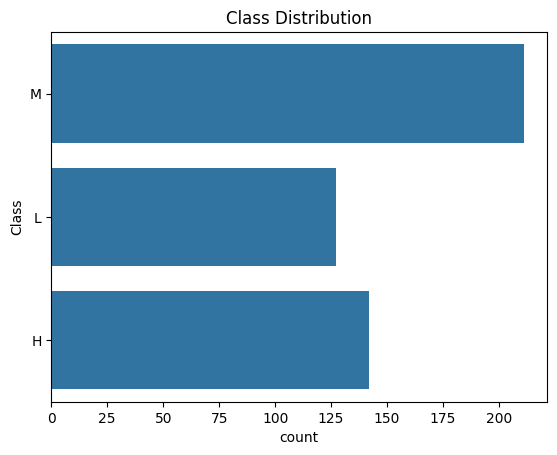

In [4]:
# Visualize the distribution
sns.countplot(mydata['Class'])
plt.title('Class Distribution')
plt.show()

In [16]:
# Encoding -> converting categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in mydata.select_dtypes(include=['object']).columns:
  mydata[column] = label_encoder.fit_transform(mydata[column])

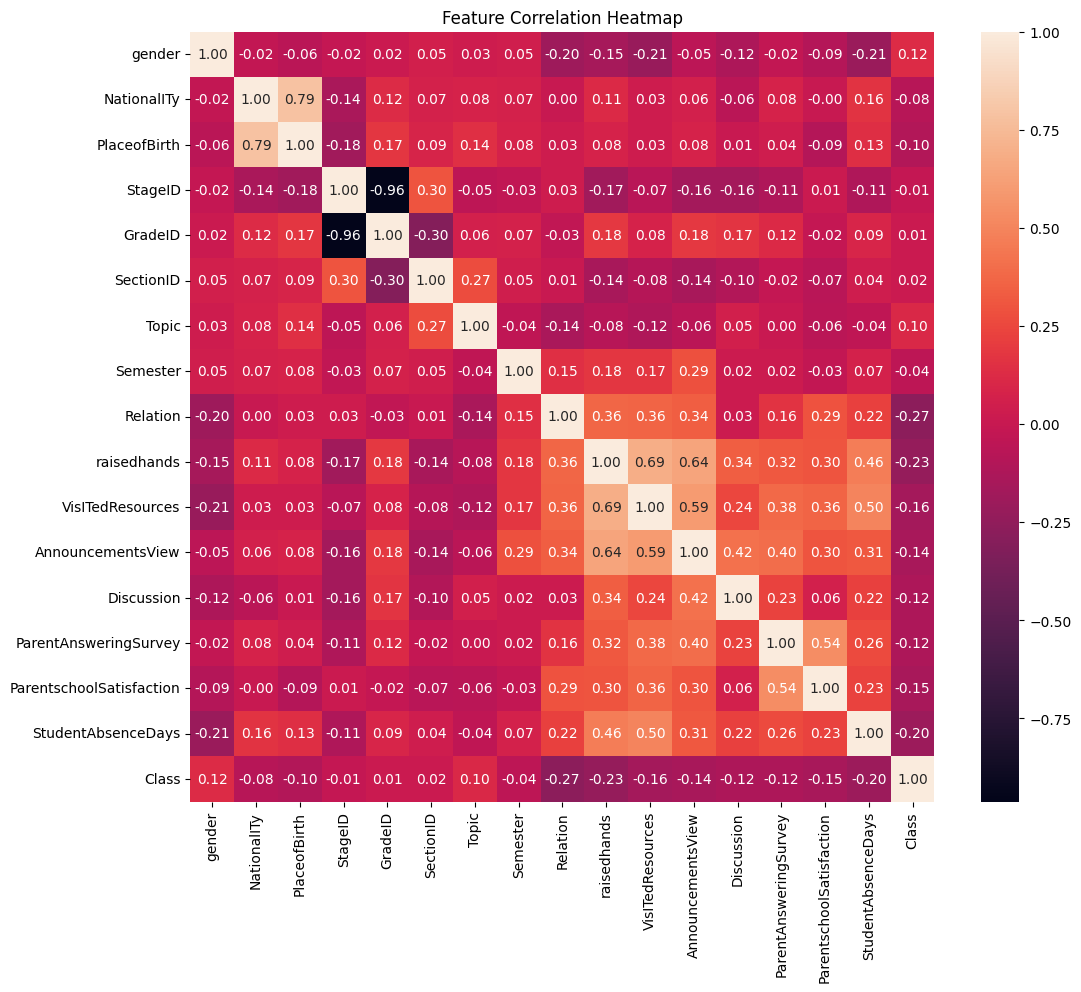

In [17]:
# Checking feature correlations using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(mydata.corr(), annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
# Split Features and Target
X = mydata.drop(columns=['Class'])
y = mydata['Class']

In [10]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Random Forest Classifier for training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_features = sorted(zip(feature_importances, feature_names), reverse=True)
for importance, name in sorted_features:
  print(f"{name}: {importance:.4f}")

VisITedResources: 0.1948
raisedhands: 0.1583
AnnouncementsView: 0.1243
StudentAbsenceDays: 0.1138
Discussion: 0.0930
Topic: 0.0428
Relation: 0.0396
ParentAnsweringSurvey: 0.0366
NationalITy: 0.0358
PlaceofBirth: 0.0343
GradeID: 0.0328
gender: 0.0252
ParentschoolSatisfaction: 0.0225
SectionID: 0.0191
StageID: 0.0162
Semester: 0.0109


In [14]:
y_pred = model.predict(X_test)

Accuracy: 0.8541666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.89      0.96      0.93        26
           2       0.87      0.83      0.85        48

    accuracy                           0.85        96
   macro avg       0.85      0.86      0.85        96
weighted avg       0.85      0.85      0.85        96



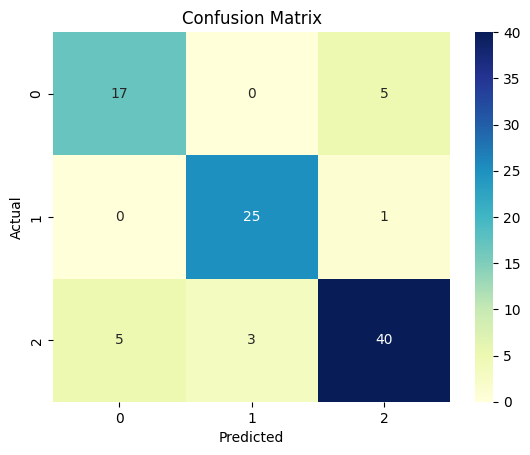

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()